In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import os
import numpy as np
import scipy as sc
import glob
import matplotlib.pyplot as plt 
import tensorflow as tf

Mounted at /content/drive


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential 
from tensorflow.keras import activations
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm import tqdm

In [ ]:
#def histogramaColor(img, p):
#  color = ('r','g','b')#definimos RGB 
#
#  plt.figure(figsize=(12,4)) # definimop el tamaño de las graficas
#  plt.subplot(2,3,p+1), plt.imshow(img) #muestra la imagen seleccionada
#  plt.axis("off") #apaga las metricas

In [ ]:
path='/content/drive/MyDrive/ProyectoPDI/' #Ruta donde estan la imagnes del ejercicio
os.chdir(path)

In [ ]:
class_names = ['Bulbasaur', 'Charmander', 'Squirtle']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)
IMAGE_SIZE=150

In [ ]:
sub_dirs = os.listdir(path)
sub_dirs.sort()
features_list = []

for label, sub_dir in enumerate(sub_dirs):
  
  for file_name in glob.glob(os.path.join('/content/drive/MyDrive/ProyectoPDI/',sub_dir,'*.jpg')):

    print("Extrayendo el archivo:{}".format(file_name))
    img = cv2.imread(file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Convierte imagenes BGR a RGB
    # img = img/255. #normalizando
    #img = cv2.resize(img,(150,150))
      
  

Extrayendo el archivo:/content/drive/MyDrive/ProyectoPDI/Bulbasaur/00000032.jpg
Extrayendo el archivo:/content/drive/MyDrive/ProyectoPDI/Bulbasaur/00000048.jpg
Extrayendo el archivo:/content/drive/MyDrive/ProyectoPDI/Bulbasaur/00000072.jpg
Extrayendo el archivo:/content/drive/MyDrive/ProyectoPDI/Bulbasaur/00000088.jpg
Extrayendo el archivo:/content/drive/MyDrive/ProyectoPDI/Bulbasaur/00000055.jpg
Extrayendo el archivo:/content/drive/MyDrive/ProyectoPDI/Bulbasaur/00000029.jpg
Extrayendo el archivo:/content/drive/MyDrive/ProyectoPDI/Bulbasaur/00000017.jpg
Extrayendo el archivo:/content/drive/MyDrive/ProyectoPDI/Bulbasaur/00000007.jpg
Extrayendo el archivo:/content/drive/MyDrive/ProyectoPDI/Bulbasaur/00000040.jpg
Extrayendo el archivo:/content/drive/MyDrive/ProyectoPDI/Bulbasaur/00000085.jpg
Extrayendo el archivo:/content/drive/MyDrive/ProyectoPDI/Bulbasaur/00000061.jpg
Extrayendo el archivo:/content/drive/MyDrive/ProyectoPDI/Bulbasaur/00000068.jpg
Extrayendo el archivo:/content/drive/MyD

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
path_dir='/content/drive/MyDrive/ProyectoPDI/'
datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.2)
train_generator = datagen.flow_from_directory(path_dir,target_size=(150,150),shuffle=True,subset='training')
validation_generator = datagen.flow_from_directory(path_dir,target_size=(150,150),subset='validation')

Found 682 images belonging to 3 classes.
Found 168 images belonging to 3 classes.


In [ ]:
#Diseñe y entrene su modelo
#Tenga cuidado con el tipo de etiquetas creado
model = Sequential()
model.add(layers.Conv2D(16, (3,3), activation = 'relu', padding='same', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(32, (3,3), padding='same', activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), padding='same', activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3,3), padding='same', activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(256, (3,3), padding='same', activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.35))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(3, activation = 'softmax'))

In [ ]:
#Compilar el modelo

opt = Adam()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
print (model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 75, 75, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 37, 37, 32)       

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose =1, patience=100)
history = model.fit(train_generator,epochs=40,batch_size=32,validation_data=(validation_generator), verbose=1)
loss, acc = model.evaluate(validation_generator, verbose=1)
print('Loss:{0} - Accuracy:{1}'.format(loss, acc))

Epoch 1/40
22/22 [==============================] - 19s 800ms/step - loss: 1.1574 - accuracy: 0.3504 - val_loss: 1.0943 - val_accuracy: 0.3393
Epoch 2/40
22/22 [==============================] - 15s 697ms/step - loss: 1.0356 - accuracy: 0.4399 - val_loss: 0.9325 - val_accuracy: 0.5298
Epoch 3/40
22/22 [==============================] - 15s 706ms/step - loss: 0.7034 - accuracy: 0.6481 - val_loss: 0.5689 - val_accuracy: 0.8214
Epoch 4/40
22/22 [==============================] - 17s 774ms/step - loss: 0.5817 - accuracy: 0.7023 - val_loss: 0.5259 - val_accuracy: 0.7679
Epoch 5/40
22/22 [==============================] - 15s 698ms/step - loss: 0.4413 - accuracy: 0.8270 - val_loss: 0.2735 - val_accuracy: 0.9464
Epoch 6/40
22/22 [==============================] - 15s 703ms/step - loss: 0.3594 - accuracy: 0.8754 - val_loss: 0.2974 - val_accuracy: 0.9405
Epoch 7/40
22/22 [==============================] - 15s 699ms/step - loss: 0.4427 - accuracy: 0.8328 - val_loss: 0.4778 - val_accuracy: 0.8512

6/6 [==============================] - 3s 447ms/step
Confusion Matrix
[[55  0  0]
 [ 0 56  0]
 [ 0  0 57]]


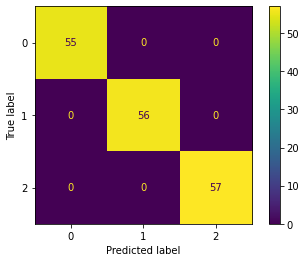

In [ ]:
pred = model.predict(validation_generator)
y_pred = np.argmax(pred, axis = 1)
y_true = np.argmax(pred, axis = 1)
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
#Función para leer imagen
def readRGB(img):
  im = cv2.imread(img)
  im= cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  return(im)

In [ ]:
etiquetas = ['Bulbasaur', 'Charmander', 'Squirtle']
img = cv2.imread("/content/drive/MyDrive/IMAGENES/descarga (1).jpeg")
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img/255. #normalizando
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3]) #Volviendolos tensores
result = model.predict(img,use_multiprocessing = True)
emociones = etiquetas[(np.argmax(result))]
#pres redondea valores de porcentajes a 1
pres = round(((result[0][np.argmax(result)])*100),2)
print('Emoción: {0}, Presición: {1}'.format(emociones,pres))



1/1 [==============================] - 0s 16ms/step
Emoción: Charmander, Presición: 96.31


In [ ]:
model.save('/content/drive/MyDrive/model.h5')